# Forecasting

Data source : https://ourworldindata.org/grapher/air-passengers-carried

## Imports

In [31]:
import csv

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def unique(liste):
    
    unique = []

    for e in liste:
        if e not in unique:
            unique.append(e)
            
    return unique


def load_data(filepath, country):

    Entity=[]
    Code = []
    Year=[]
    Passengers=[]


    with open(filepath, newline='') as file:

        filereader = csv.reader(file, delimiter=',', quotechar='"')

        for row in filereader:

            if row[1] == country :
            
                Entity.append(row[0])
                Code.append(row[1])
                Year.append(row[2])
                Passengers.append(row[3])
                
    return Entity, Code, Year, Passengers

## Variables

In [17]:
x = np.array([5, 15, 25, 35, 45, 55, 65, 75]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38, 60, 70])

# x = np.linspace(start = 1, stop=100, num=50)
# Y = np.linspace(start = 1, stop=100, num=50)


In [47]:

Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')
Entity_usa, Code_usa, Year_usa, Passengers_usa = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

data_fra = zip(Year_fra, Passengers_fra)
data_usa = zip(Year_usa, Passengers_usa)

print(Entity_fra[:1], Entity_fra[-1:])
print(Code_fra[:1], Code_fra[-1:])
print(Year_fra[:1], Year_fra[-1:])
print(Passengers_fra[:1], Passengers_fra[-1:])


['France'] ['France']
['FRA'] ['FRA']
['1970'] ['2021']
['9108000'] ['32000528']


In [52]:

x = np.array(Passengers_fra, dtype='int')
y = np.array(Passengers_usa, dtype='int')
        

## Linear regression

In [37]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(x, y)
#lr = LinearRegression().fit(x.reshape((-1, 1)), y.reshape((-1, 1)))

r_sq = lr.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {lr.intercept_}")

print(f"slope: {lr.coef_}")

y_pred = lr.predict(x)
print(f"predicted response:\n{y_pred}")

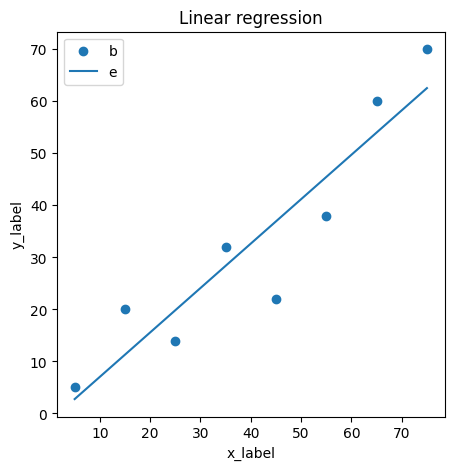

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y, label='raw data')
ax.plot(x,y_pred, label='regression')
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')

ax.legend('best')
plt.title("Linear regression")
plt.savefig('example_LinearRegresion.png');

## Moving Average

In [ ]:
def movingaverage(interval, window_size):
    
    window = np.ones(int(window_size))/float(window_size)
    
    return np.convolve(interval, window, 'same')

movingaverage(interval=x, window_size=3)

In [54]:
window_width = 3

cumsum_vec = np.cumsum(np.insert(x, 0, 0)) 
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

print(x)
print(cumsum_vec )
print(ma_vec)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[  0   5  20  45  80 125 180]
[15. 25. 35. 45.]


In [20]:
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

n = 3
y_pred = moving_avg(x, n)

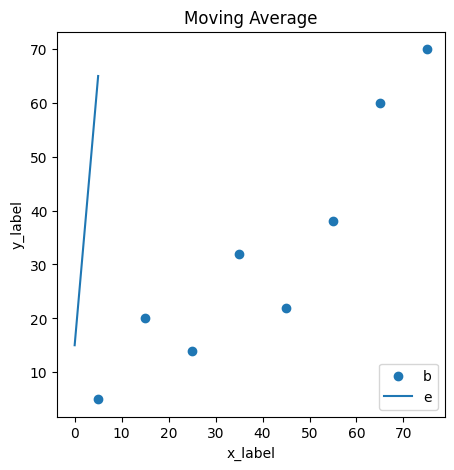

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y, label='raw data')
ax.plot(y_pred, label='moving average')
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')

ax.legend('best')
plt.title("Moving Average")
plt.savefig('example_MovingAverage.png');

## Polynomial Regression

## Simple Exponential smoothing

## Double exponential smoothing : Holt

## Triple exponential smoothing : Holt-Winter

## Croston